In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data=np.array(data)
m, n= data.shape
np.random.shuffle(data)
data_Dev = data[0:1000].T
y_dev = data_Dev[0]
x_dev=data_Dev[1:n]
x_dev = x_dev/255

data_train = data[100:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train/255
_,m_train = x_train.shape

 


In [19]:
def init_params():
    w1=np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1)-0.5
    w2= np.random.rand(10,10)-0.5
    b2= np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

def relu(z):
    return np.maximum(z,0)
    
def softmax(z):
    a = np.exp(z)/sum(np.exp(z))
    return a

def forward_prop(w1,b1,w2,b2,x):
    z1= w1.dot(x)+b1
    a1= relu(z1)
    z2= w2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2
    
def one_hoty(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y] = 1
    one_hot_y=one_hot_y.T
    return one_hot_y

def derelu(z):
    return z>0

def back_prop(z1,a1,z2,a2,w2,x,y):
    m=y.size
    one_hot_y=one_hoty(y)
    dz2= a2-one_hot_y
    dw2 = 1/m * dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1 = w2.T.dot(dz2)*derelu(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)
    return dw1,db1,dw2,db2

def updateparams( w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2
    

In [20]:
def get_predictions(a):
    return np.argmax(a,0)

def get_accuracy(pred,y):
    print(pred,y)
    return np.sum(pred == y)/y.size


def gradient_descent(x,y,itr,alpha):
    w1,b1,w2,b2 = init_params()
    for i in range(itr):
        z1,a1,z2,a2= forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w2,x,y)
        w1,b1,w2,b2 = updateparams(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%50==0:
            print("iteration ", i)
            print("accuarcy ",get_accuracy(get_predictions(a2),y))
    return w1,b1,w2,b2

In [21]:
w1,b1,w2,b2 = gradient_descent(x_train,y_train,500,0.1)

iteration  0
[1 1 7 ... 0 1 8] [6 5 8 ... 0 4 5]
accuarcy  0.090763723150358
iteration  50
[2 7 7 ... 1 3 3] [6 5 8 ... 0 4 5]
accuarcy  0.4656801909307876
iteration  100
[2 8 3 ... 2 9 3] [6 5 8 ... 0 4 5]
accuarcy  0.615489260143198
iteration  150
[2 8 3 ... 2 9 3] [6 5 8 ... 0 4 5]
accuarcy  0.6820286396181384
iteration  200
[2 8 8 ... 2 9 3] [6 5 8 ... 0 4 5]
accuarcy  0.7218615751789976
iteration  250
[2 8 8 ... 2 9 3] [6 5 8 ... 0 4 5]
accuarcy  0.7513603818615752
iteration  300
[2 8 8 ... 2 4 3] [6 5 8 ... 0 4 5]
accuarcy  0.773890214797136
iteration  350
[2 8 8 ... 2 4 3] [6 5 8 ... 0 4 5]
accuarcy  0.7925298329355609
iteration  400
[2 8 8 ... 0 4 3] [6 5 8 ... 0 4 5]
accuarcy  0.8068496420047733
iteration  450
[2 8 8 ... 0 4 3] [6 5 8 ... 0 4 5]
accuarcy  0.8177804295942721


In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


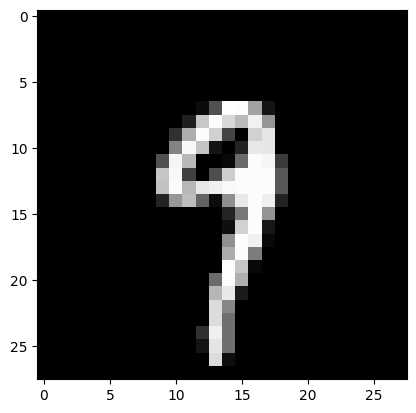

In [24]:
test_prediction(220,w1,b1,w2,b2)

In [25]:
data.shape

(42000, 785)